Install MS core fonts

- apt update
- apt install msttcorefonts -qq
- rm ~/.cache/matplotlib -rf

In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams["font.family"] = "Times New Roman"

In [3]:
csv_path = Path("logs/summary.csv")
df = pd.read_csv(csv_path)
df["pricing"] = df.pricing.astype(float) / 3600.0
df

,instance,type,region,pricing,batch size,boot time in seconds,training time in seconds,total time in seconds,tasks,iter.per.task,epochs,first.epoch.sec,first.iter.sec,number of nodes
0,g4dn.xlarge,IaaS,us-east-1,0.000146,1,474.000,469.000,943.000,1,16,10,154,125.117,1
1,g4dn.xlarge,IaaS,us-east-1,0.000146,1,474.000,448.000,922.000,1,16,10,153,125.065,1
2,g4dn.xlarge,IaaS,us-east-1,0.000146,1,474.000,444.000,918.000,1,16,10,153,125.086,1
3,p3.2xlarge,IaaS,us-east-1,0.000850,1,449.000,283.000,732.000,1,16,10,184,173.926,1
4,p3.2xlarge,IaaS,us-east-1,0.000850,1,449.000,249.000,698.000,1,16,10,146,136.521,1
5,p3.2xlarge,IaaS,us-east-1,0.000850,1,449.000,246.000,695.000,1,16,10,146,136.409,1
6,p2.xlarge,IaaS,us-east-1,0.000250,1,608.000,1117.000,1725.000,1,16,10,273,181.529,1
7,p2.xlarge,IaaS,us-east-1,0.000250,1,398.000,1154.000,1552.000,1,16,10,239,148.514,1
8,p2.xlarge,IaaS,us-east-1,0.000250,1,436.000,1117.000,1553.000,1,16,10,275,188.090,1
9,ml.g4dn.xlarge,SageMaker,us-east-1,0.000204,2,248.000,265.000,513.000,1,8,10,32,9.497,1


In [4]:
df = df[df["batch size"] == 1]
df

,instance,type,region,pricing,batch size,boot time in seconds,training time in seconds,total time in seconds,tasks,iter.per.task,epochs,first.epoch.sec,first.iter.sec,number of nodes
0,g4dn.xlarge,IaaS,us-east-1,0.000146,1,474.000,469.000,943.000,1,16,10,154,125.117,1
1,g4dn.xlarge,IaaS,us-east-1,0.000146,1,474.000,448.000,922.000,1,16,10,153,125.065,1
2,g4dn.xlarge,IaaS,us-east-1,0.000146,1,474.000,444.000,918.000,1,16,10,153,125.086,1
3,p3.2xlarge,IaaS,us-east-1,0.000850,1,449.000,283.000,732.000,1,16,10,184,173.926,1
4,p3.2xlarge,IaaS,us-east-1,0.000850,1,449.000,249.000,698.000,1,16,10,146,136.521,1
5,p3.2xlarge,IaaS,us-east-1,0.000850,1,449.000,246.000,695.000,1,16,10,146,136.409,1
6,p2.xlarge,IaaS,us-east-1,0.000250,1,608.000,1117.000,1725.000,1,16,10,273,181.529,1
7,p2.xlarge,IaaS,us-east-1,0.000250,1,398.000,1154.000,1552.000,1,16,10,239,148.514,1
8,p2.xlarge,IaaS,us-east-1,0.000250,1,436.000,1117.000,1553.000,1,16,10,275,188.090,1
12,ml.g4dn.xlarge,SageMaker,us-east-1,0.000204,1,242.000,322.000,564.000,1,16,10,36,7.358,1


In [5]:
df["instance"] = df.instance.str.strip()
df

/tmp/ipykernel_266/1656391671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["instance"] = df.instance.str.strip()


,instance,type,region,pricing,batch size,boot time in seconds,training time in seconds,total time in seconds,tasks,iter.per.task,epochs,first.epoch.sec,first.iter.sec,number of nodes
0,g4dn.xlarge,IaaS,us-east-1,0.000146,1,474.000,469.000,943.000,1,16,10,154,125.117,1
1,g4dn.xlarge,IaaS,us-east-1,0.000146,1,474.000,448.000,922.000,1,16,10,153,125.065,1
2,g4dn.xlarge,IaaS,us-east-1,0.000146,1,474.000,444.000,918.000,1,16,10,153,125.086,1
3,p3.2xlarge,IaaS,us-east-1,0.000850,1,449.000,283.000,732.000,1,16,10,184,173.926,1
4,p3.2xlarge,IaaS,us-east-1,0.000850,1,449.000,249.000,698.000,1,16,10,146,136.521,1
5,p3.2xlarge,IaaS,us-east-1,0.000850,1,449.000,246.000,695.000,1,16,10,146,136.409,1
6,p2.xlarge,IaaS,us-east-1,0.000250,1,608.000,1117.000,1725.000,1,16,10,273,181.529,1
7,p2.xlarge,IaaS,us-east-1,0.000250,1,398.000,1154.000,1552.000,1,16,10,239,148.514,1
8,p2.xlarge,IaaS,us-east-1,0.000250,1,436.000,1117.000,1553.000,1,16,10,275,188.090,1
12,ml.g4dn.xlarge,SageMaker,us-east-1,0.000204,1,242.000,322.000,564.000,1,16,10,36,7.358,1


In [6]:
means = df.groupby("instance").mean()
means

,pricing,batch size,boot time in seconds,training time in seconds,total time in seconds,tasks,iter.per.task,epochs,first.epoch.sec,first.iter.sec,number of nodes
instance,,,,,,,,,,,
2xg4dn.xlarge,0.000146,1.0,374.000000,304.000000,678.000000,2.0,8.0,10.0,147.000000,NaN,2.0
2xp3.2xlarge,0.000850,1.0,324.000000,187.000000,511.000000,2.0,8.0,10.0,129.000000,NaN,2.0
3xg4dn.xlarge,0.000146,1.0,306.000000,224.000000,530.000000,3.0,6.0,10.0,123.000000,NaN,3.0
3xp3.2xlarge,0.000850,1.0,291.000000,160.000000,451.000000,3.0,6.0,10.0,114.000000,NaN,3.0
4xg4dn.xlarge,0.000146,1.0,280.000000,186.000000,465.000000,4.0,4.0,10.0,105.000000,NaN,4.0
4xp3.2xlarge,0.000850,1.0,285.000000,142.000000,427.000000,4.0,4.0,10.0,105.000000,NaN,4.0
g3.16xlarge,0.001267,1.0,320.000000,162.666667,482.666667,4.0,4.0,10.0,58.666667,50.063000,1.0
g3.8xlarge,0.000633,1.0,290.000000,297.666667,587.666667,2.0,8.0,10.0,92.666667,73.707333,1.0
g3s.xlarge,0.000258,1.0,399.659000,594.014000,993.659000,1.0,16.0,10.0,195.333333,155.093667,1.0


In [7]:
means["boot time cost"] = means["boot time in seconds"] * means["pricing"] * means["number of nodes"]
means["training time cost"] = means["training time in seconds"] * means["pricing"] * means["number of nodes"]
means["total time cost"] = means["total time in seconds"] * means["pricing"] * means["number of nodes"]
means.sort_index(inplace=True)
means

,pricing,batch size,boot time in seconds,training time in seconds,total time in seconds,tasks,iter.per.task,epochs,first.epoch.sec,first.iter.sec,number of nodes,boot time cost,training time cost,total time cost
instance,,,,,,,,,,,,,,
2xg4dn.xlarge,0.000146,1.0,374.000000,304.000000,678.000000,2.0,8.0,10.0,147.000000,NaN,2.0,0.109291,0.088836,0.198127
2xp3.2xlarge,0.000850,1.0,324.000000,187.000000,511.000000,2.0,8.0,10.0,129.000000,NaN,2.0,0.550800,0.317900,0.868700
3xg4dn.xlarge,0.000146,1.0,306.000000,224.000000,530.000000,3.0,6.0,10.0,123.000000,NaN,3.0,0.134130,0.098187,0.232317
3xp3.2xlarge,0.000850,1.0,291.000000,160.000000,451.000000,3.0,6.0,10.0,114.000000,NaN,3.0,0.742050,0.408000,1.150050
4xg4dn.xlarge,0.000146,1.0,280.000000,186.000000,465.000000,4.0,4.0,10.0,105.000000,NaN,4.0,0.163644,0.108707,0.271767
4xp3.2xlarge,0.000850,1.0,285.000000,142.000000,427.000000,4.0,4.0,10.0,105.000000,NaN,4.0,0.969000,0.482800,1.451800
g3.16xlarge,0.001267,1.0,320.000000,162.666667,482.666667,4.0,4.0,10.0,58.666667,50.063000,1.0,0.405333,0.206044,0.611378
g3.8xlarge,0.000633,1.0,290.000000,297.666667,587.666667,2.0,8.0,10.0,92.666667,73.707333,1.0,0.183667,0.188522,0.372189
g3s.xlarge,0.000258,1.0,399.659000,594.014000,993.659000,1.0,16.0,10.0,195.333333,155.093667,1.0,0.103245,0.153454,0.256695


In [8]:
def select_pareto_frontier_points(Xs, Ys, maxX=True, maxY=True):
    '''Pareto frontier selection process'''
    sorted_list = sorted([[Xs[i], Ys[i]] for i in range(len(Xs))], reverse=maxY)
    pareto_front = [sorted_list[0]]
    for pair in sorted_list[1:]:
        if maxY:
            if pair[1] >= pareto_front[-1][1]:
                pareto_front.append(pair)
        else:
            if pair[1] <= pareto_front[-1][1]:
                pareto_front.append(pair)
    return pareto_front


In [9]:
def select_pareto_frontier_points(Xs, Ys, maxX=True, maxY=True):
    '''Pareto frontier selection process'''
    sorted_list = sorted([[Xs[i], Ys[i]] for i in range(len(Xs))], reverse=maxY)
    pareto_front = [sorted_list[0]]
    pareto_index = []
    for pair in sorted_list[1:]:
        if maxY:
            if pair[1] >= pareto_front[-1][1]:
                pareto_front.append(pair)
                # pareto_index.append(pareto_front.index(pair))
        else:
            if pair[1] <= pareto_front[-1][1]:
                pareto_front.append(pair)
                # pareto_index.append(pareto_front.index(pair))
    return pareto_front, pareto_index

# All Instances

In [10]:
selected_means = means

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


[11, 4, 13]


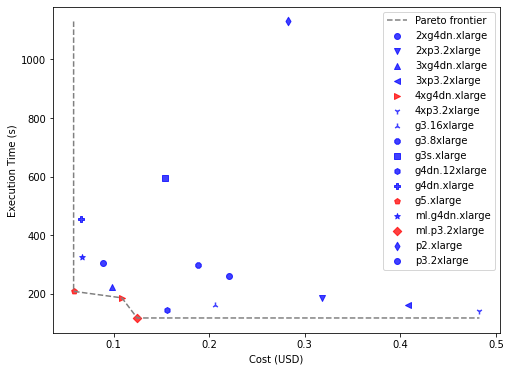

In [11]:
instances = selected_means.index.values
paretto_frontier_instance = ['g5.xlarge', '4xg4dn.xlarge', 'ml.p3.2xlarge']
paretto_points = [i.strip() in paretto_frontier_instance for i in instances] 
paretto_colors = [ "red" if i else "blue" for i in paretto_points ]

xs = selected_means["training time cost"].values
ys = selected_means["training time in seconds"].values

# Collect pareto frontier points to draw dashed line
pareto_front, pareto_index = select_pareto_frontier_points(xs, ys, maxX=False, maxY=False)
# print(pareto_index, pareto_front)
pareto_indexes = []
for x, y in pareto_front:
    val = [i for i, (_x, _y) in enumerate(zip(xs, ys)) if _x==x and _y==y][0]
    pareto_indexes.append(val)
    
print(pareto_indexes)
    
pf_X = [pair[0] for pair in pareto_front]
pf_Y = [pair[1] for pair in pareto_front]
pf_X.insert(0,pf_X[0])
pf_Y.insert(0,max(ys))
pf_X.append(max(xs))
pf_Y.append(pf_Y[-1])

markers = ["o", "v", "^", "<", ">", "1", "2", "8", "s", "h", "P", "p", "*", "D", "d"]*2
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(pf_X, pf_Y,color='gray', linestyle='dashed', label="Pareto frontier")

for label, x, y, marker, color in zip(instances, xs, ys, markers, paretto_colors):
    ax.scatter(x, y, label=label, marker=marker, c=color, alpha=0.75)
    
ax.set_xlabel("Cost (USD)")
ax.set_ylabel("Execution Time (s)")

ax.legend()
plt.savefig("img/instances-cost-pareto-all.pdf", bbox_inches="tight") 
plt.show()

# All except distributed

In [12]:
selected_means = means.loc[["g3.16xlarge", "g3.8xlarge", "g3s.xlarge", "g4dn.12xlarge", "g4dn.xlarge", "g5.xlarge", "ml.g4dn.xlarge", "ml.p3.2xlarge", "p2.xlarge", "p3.2xlarge"]]

[5, 7]


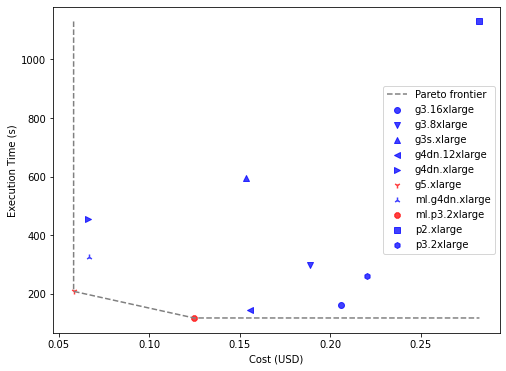

In [13]:
instances = selected_means.index.values
paretto_frontier_instance = ['g5.xlarge', 'ml.p3.2xlarge']
paretto_points = [i in paretto_frontier_instance for i in instances] 
paretto_colors = [ "red" if i else "blue" for i in paretto_points ]

xs = selected_means["training time cost"].values
ys = selected_means["training time in seconds"].values

# Collect pareto frontier points to draw dashed line
pareto_front, pareto_index = select_pareto_frontier_points(xs, ys, maxX=False, maxY=False)
# print(pareto_index, pareto_front)
pareto_indexes = []
for x, y in pareto_front:
    val = [i for i, (_x, _y) in enumerate(zip(xs, ys)) if _x==x and _y==y][0]
    pareto_indexes.append(val)
    
print(pareto_indexes)
    
pf_X = [pair[0] for pair in pareto_front]
pf_Y = [pair[1] for pair in pareto_front]
pf_X.insert(0,pf_X[0])
pf_Y.insert(0,max(ys))
pf_X.append(max(xs))
pf_Y.append(pf_Y[-1])

markers = ["o", "v", "^", "<", ">", "1", "2", "8", "s", "h", "P", "p", "*", "D", "d"]*2
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(pf_X, pf_Y,color='gray', linestyle='dashed', label="Pareto frontier")

for label, x, y, marker, color in zip(instances, xs, ys, markers, paretto_colors):
    ax.scatter(x, y, label=label, marker=marker, c=color, alpha=0.75)
    
ax.set_xlabel("Cost (USD)")
ax.set_ylabel("Execution Time (s)")

ax.legend()
plt.savefig("img/instances-cost-pareto-except-dist.pdf", bbox_inches="tight") 
plt.show()

# All except distributed and SM

In [14]:
selected_means = means.loc[["g3.16xlarge", "g3.8xlarge", "g3s.xlarge", "g4dn.12xlarge", "g4dn.xlarge", "g5.xlarge", "p2.xlarge", "p3.2xlarge"]]

[5, 3]


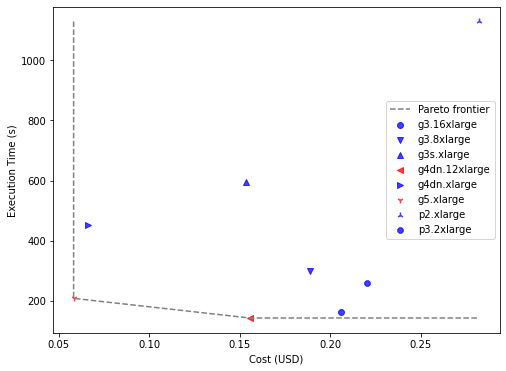

In [15]:
instances = selected_means.index.values
paretto_frontier_instance = ['g5.xlarge', 'g4dn.12xlarge']
paretto_points = [i in paretto_frontier_instance for i in instances] 
paretto_colors = [ "red" if i else "blue" for i in paretto_points ]

xs = selected_means["training time cost"].values
ys = selected_means["training time in seconds"].values

# Collect pareto frontier points to draw dashed line
pareto_front, pareto_index = select_pareto_frontier_points(xs, ys, maxX=False, maxY=False)
# print(pareto_index, pareto_front)
pareto_indexes = []
for x, y in pareto_front:
    val = [i for i, (_x, _y) in enumerate(zip(xs, ys)) if _x==x and _y==y][0]
    pareto_indexes.append(val)
    
print(pareto_indexes)
    
pf_X = [pair[0] for pair in pareto_front]
pf_Y = [pair[1] for pair in pareto_front]
pf_X.insert(0,pf_X[0])
pf_Y.insert(0,max(ys))
pf_X.append(max(xs))
pf_Y.append(pf_Y[-1])

markers = ["o", "v", "^", "<", ">", "1", "2", "8", "s", "h", "P", "p", "*", "D", "d"]*2
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(pf_X, pf_Y,color='gray', linestyle='dashed', label="Pareto frontier")

for label, x, y, marker, color in zip(instances, xs, ys, markers, paretto_colors):
    ax.scatter(x, y, label=label, marker=marker, c=color, alpha=0.75)
    
ax.set_xlabel("Cost (USD)")
ax.set_ylabel("Execution Time (s)")

ax.legend()
plt.savefig("img/instances-cost-pareto-except-dist-sm.pdf", bbox_inches="tight") 
plt.show()

# All except SM

In [16]:
selected_means = means.loc[["2xg4dn.xlarge", "2xp3.2xlarge", "3xg4dn.xlarge", "3xp3.2xlarge", "4xg4dn.xlarge", "4xp3.2xlarge", "g3.16xlarge", "g3.8xlarge", "g3s.xlarge", "g4dn.12xlarge", "g4dn.xlarge", "g5.xlarge", "p2.xlarge", "p3.2xlarge"]]

[11, 4, 9, 5]


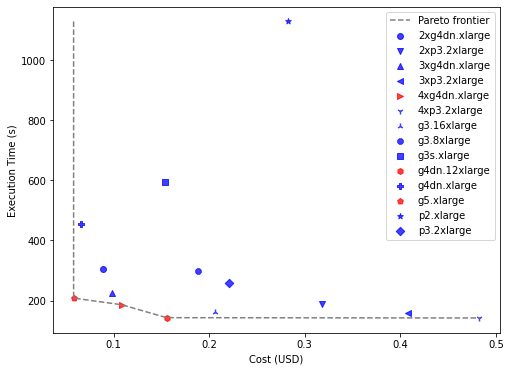

In [17]:
instances = selected_means.index.values
paretto_frontier_instance = ['g5.xlarge', "4xg4dn.xlarge", 'g4dn.12xlarge']
paretto_points = [i in paretto_frontier_instance for i in instances] 
paretto_colors = [ "red" if i else "blue" for i in paretto_points ]

xs = selected_means["training time cost"].values
ys = selected_means["training time in seconds"].values

# Collect pareto frontier points to draw dashed line
pareto_front, pareto_index = select_pareto_frontier_points(xs, ys, maxX=False, maxY=False)
# print(pareto_index, pareto_front)
pareto_indexes = []
for x, y in pareto_front:
    val = [i for i, (_x, _y) in enumerate(zip(xs, ys)) if _x==x and _y==y][0]
    pareto_indexes.append(val)
    
print(pareto_indexes)
    
pf_X = [pair[0] for pair in pareto_front]
pf_Y = [pair[1] for pair in pareto_front]
pf_X.insert(0,pf_X[0])
pf_Y.insert(0,max(ys))
pf_X.append(max(xs))
pf_Y.append(pf_Y[-1])

markers = ["o", "v", "^", "<", ">", "1", "2", "8", "s", "h", "P", "p", "*", "D", "d"]*2
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(pf_X, pf_Y,color='gray', linestyle='dashed', label="Pareto frontier")

for label, x, y, marker, color in zip(instances, xs, ys, markers, paretto_colors):
    ax.scatter(x, y, label=label, marker=marker, c=color, alpha=0.75)
    
ax.set_xlabel("Cost (USD)")
ax.set_ylabel("Execution Time (s)")

ax.legend()
plt.savefig("img/instances-cost-pareto-except-sm.pdf", bbox_inches="tight") 
plt.show()